<a href="https://colab.research.google.com/github/jinkasaru123/saru1/blob/main/Data%20Analysis17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/#2208787.csv')


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Impute missing values in the 'EstimatedSalary' column with the mean value
df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean(), inplace=True)

# Verify there are no more missing values
df.isnull().sum()



RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Generate summary statistics
summary_statistics = df.describe()
summary_statistics



,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,4791.000000,4.791000e+03,4791.000000,4791.000000,4791.000000,4791.000000,4791.000000,4791.000000,4791.000000,4.791000e+03,4791.000000
mean,5042.899395,1.569202e+07,698.746321,39.450219,5.005218,77842.999854,1.539136,0.709873,0.515341,1.033314e+05,0.206637
std,2872.774987,7.165178e+04,508.017019,17.517797,2.884444,62396.179607,0.586987,0.453868,0.499817,7.726720e+04,0.404935
min,1.000000,1.556578e+07,58.625000,3.800000,0.000000,0.000000,1.000000,0.000000,0.000000,1.158000e+01,0.000000
25%,2558.000000,1.563059e+07,582.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,5.077752e+04,0.000000
50%,5088.000000,1.569195e+07,651.000000,37.000000,5.000000,98684.150000,1.000000,1.000000,1.000000,1.009409e+05,0.000000
75%,7542.000000,1.575453e+07,717.000000,44.000000,7.000000,128507.195000,2.000000,1.000000,1.000000,1.495549e+05,0.000000
max,10000.000000,1.581569e+07,6800.000000,330.000000,10.000000,222267.630000,4.000000,1.000000,1.000000,1.354520e+06,1.000000


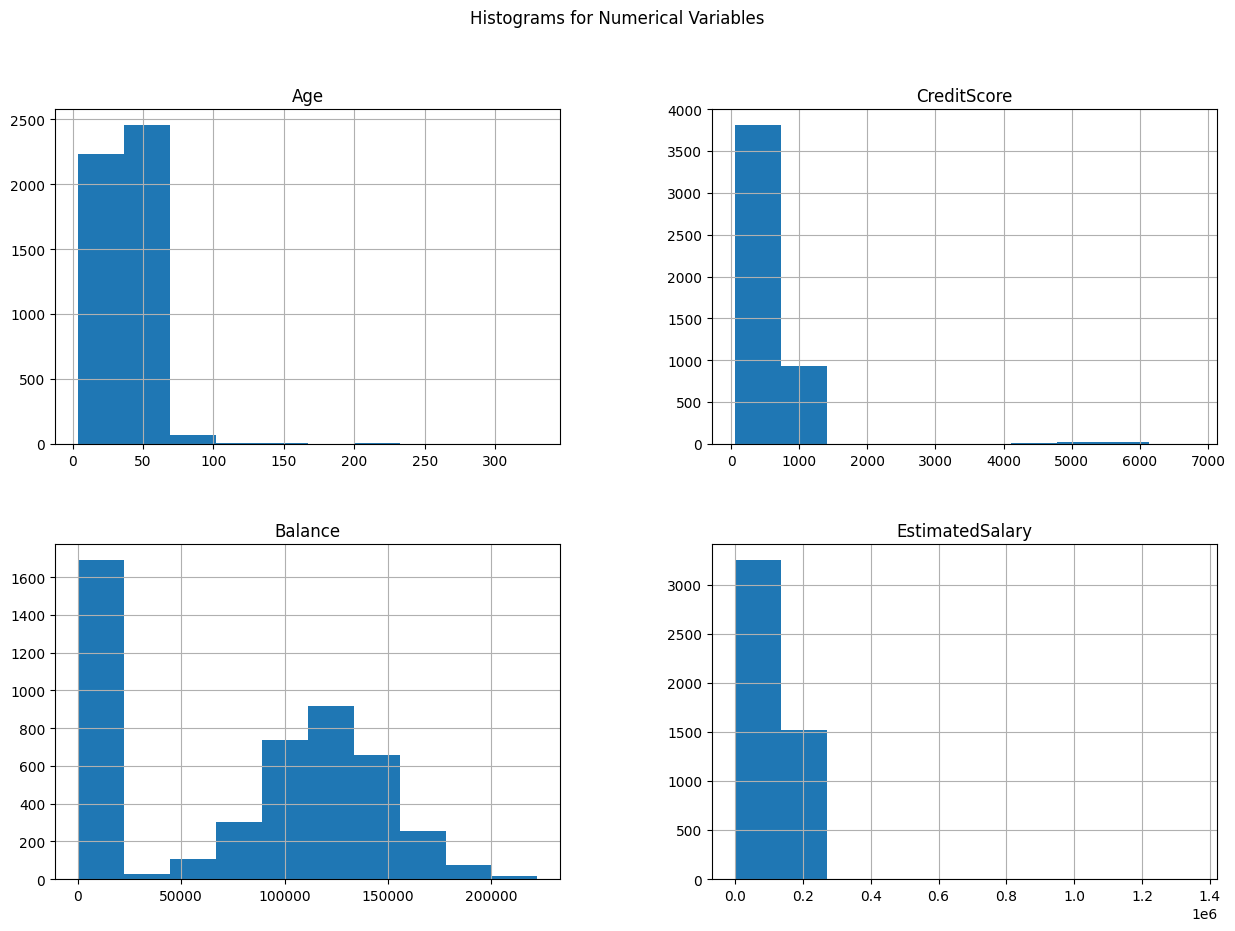

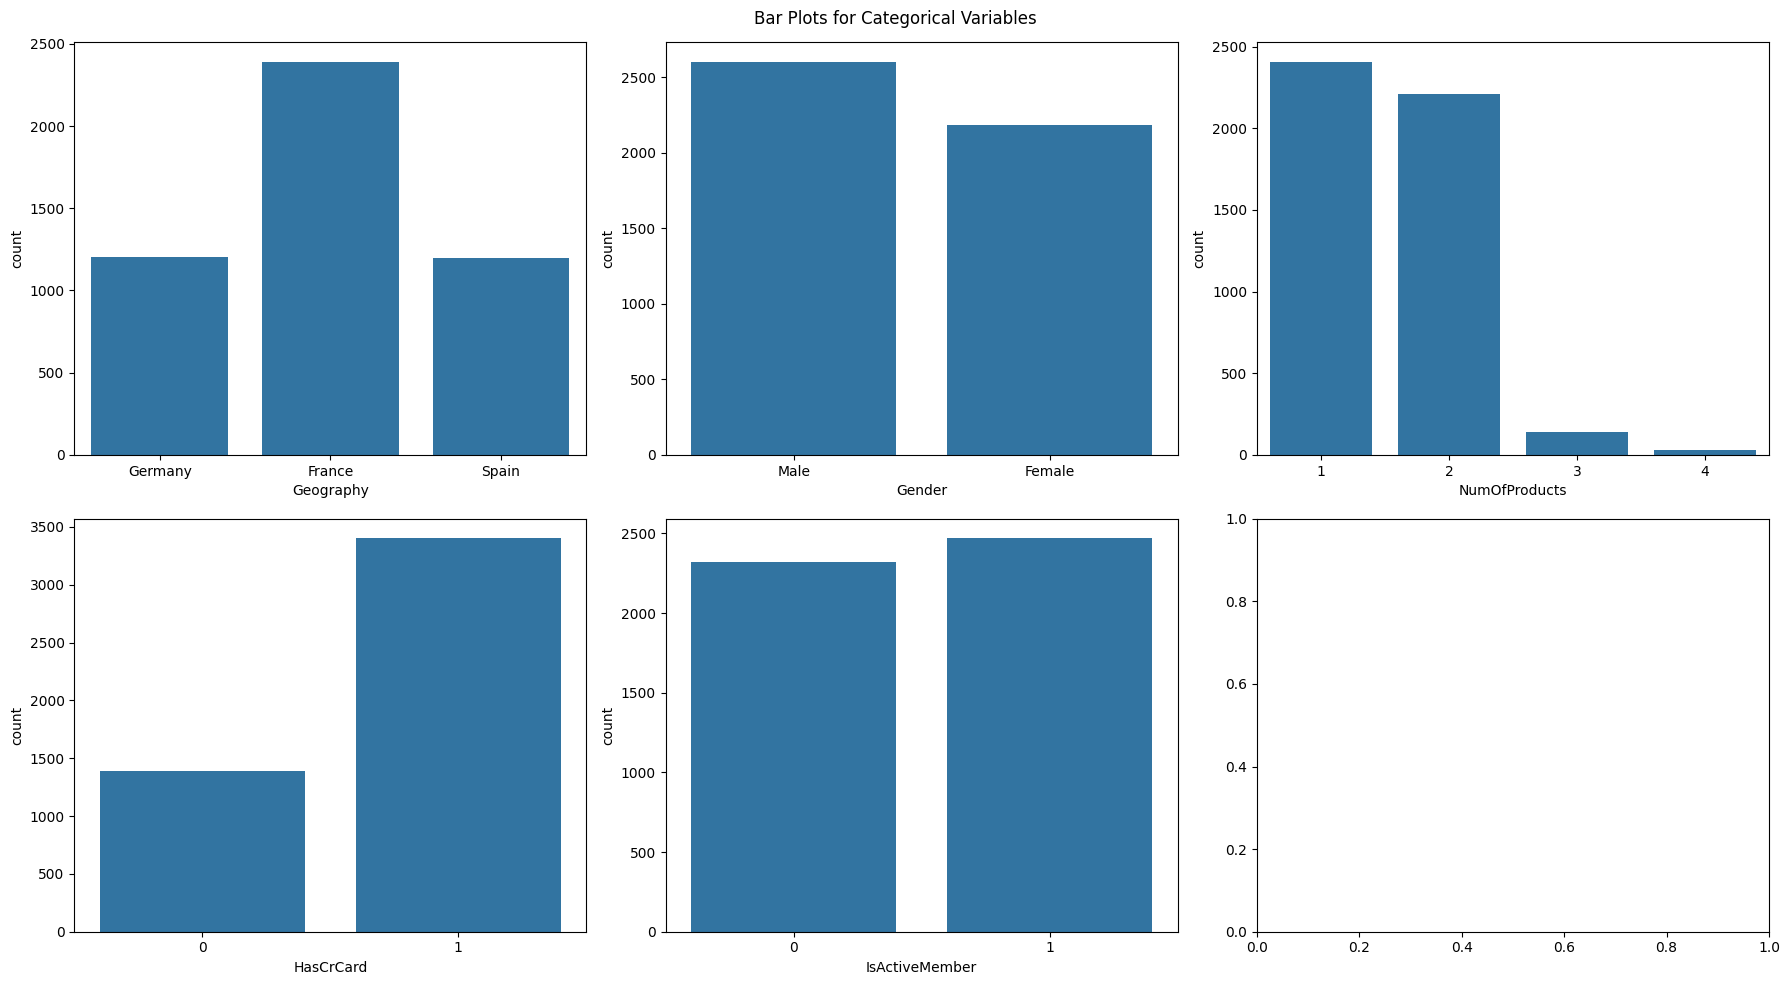

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical variables
numerical_vars = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
df[numerical_vars].hist(bins=10, figsize=(15, 10))
plt.suptitle('Histograms for Numerical Variables')
plt.show()

# Bar plots for categorical variables
categorical_vars = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Bar Plots for Categorical Variables')
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=df, ax=axes[i//3, i%3])
plt.tight_layout()
plt.show()



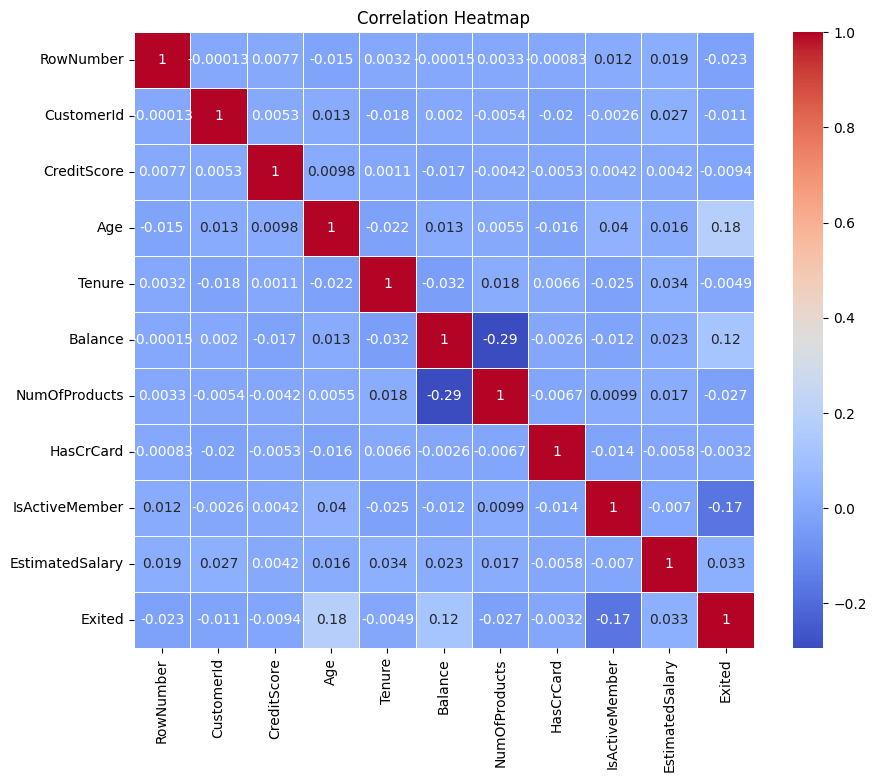

In [14]:
# Select only numerical columns for correlation matrix
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



In [15]:
# Total balance per customer
total_balance = df.groupby('CustomerId')['Balance'].sum().sort_values(ascending=False)
total_balance.head()

# Average balance per customer
average_balance = df.groupby('CustomerId')['Balance'].mean().sort_values(ascending=False)
average_balance.head()


CustomerId
15714241    222267.63
15599131    214346.96
15594408    213146.20
15620268    212696.32
15690589    212314.03
Name: Balance, dtype: float64

<ipython-input-16-32deba6566d8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segmentation.index, y=segmentation.values, palette='viridis')


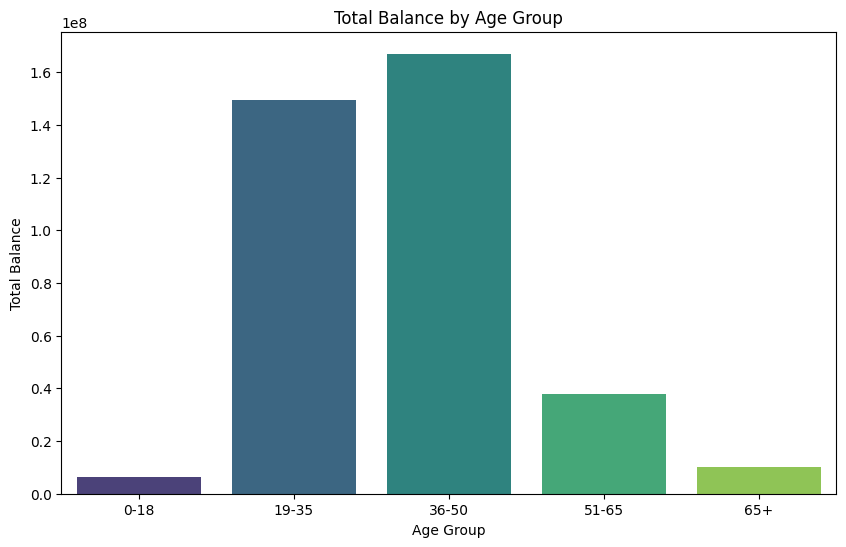

In [16]:
# Age group segmentation
age_groups = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])
df['AgeGroup'] = age_groups
segmentation = df.groupby('AgeGroup')['Balance'].sum()
segmentation

# Visualize segmentation by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x=segmentation.index, y=segmentation.values, palette='viridis')
plt.title('Total Balance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Balance')
plt.show()


<Figure size 1400x800 with 0 Axes>

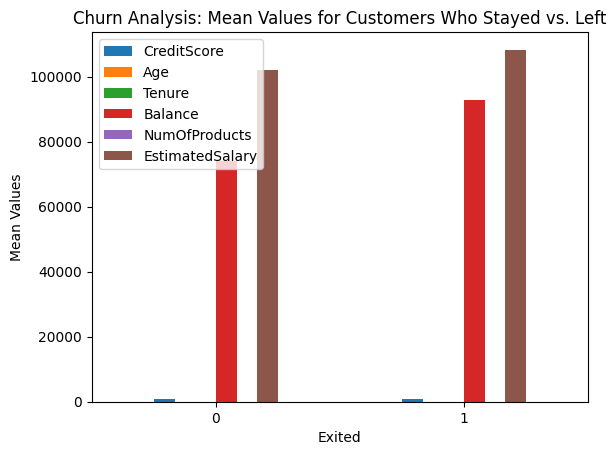

In [19]:
# Select only numerical columns for churn analysis
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Analyzing customer churn
churn_analysis = df.groupby('Exited')[numerical_cols].mean()
churn_analysis

# Visualize churn analysis
plt.figure(figsize=(14, 8))
churn_analysis[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].plot(kind='bar')
plt.title('Churn Analysis: Mean Values for Customers Who Stayed vs. Left')
plt.xlabel('Exited')
plt.ylabel('Mean Values')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()




In [20]:
# Group by Geography and calculate total balance
geo_total_balance = df.groupby('Geography')['Balance'].sum()
print(geo_total_balance)

# Group by Geography and calculate average balance
geo_avg_balance = df.groupby('Geography')['Balance'].mean()
print(geo_avg_balance)

# Count the number of customers in each geography
geo_customer_count = df['Geography'].value_counts()
print(geo_customer_count)


Geography
France     1.495752e+08
Germany    1.433682e+08
Spain      8.000241e+07
Name: Balance, dtype: float64
Geography
France      62531.441292
Germany    119374.018018
Spain       66779.974199
Name: Balance, dtype: float64
Geography
France     2392
Germany    1201
Spain      1198
Name: count, dtype: int64


<ipython-input-21-466e4b11e7a2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo_total_balance.index, y=geo_total_balance.values, palette='viridis')


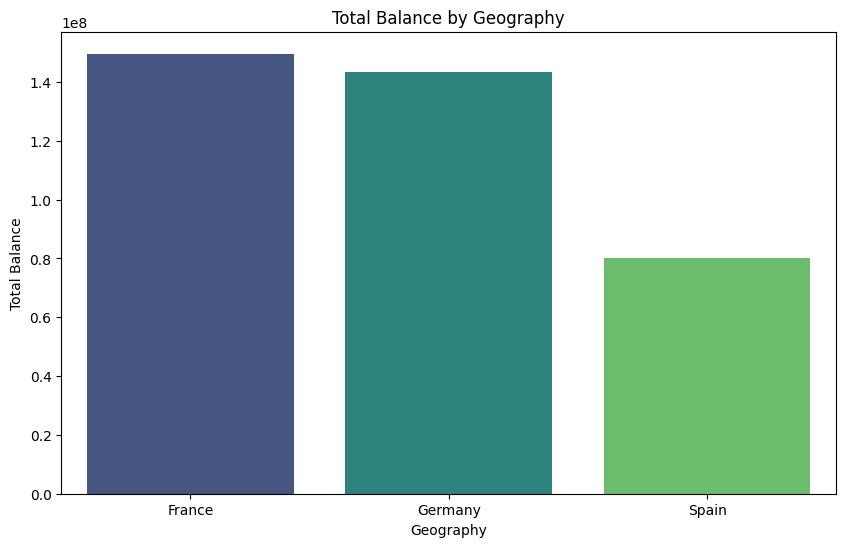

<ipython-input-21-466e4b11e7a2>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo_avg_balance.index, y=geo_avg_balance.values, palette='viridis')


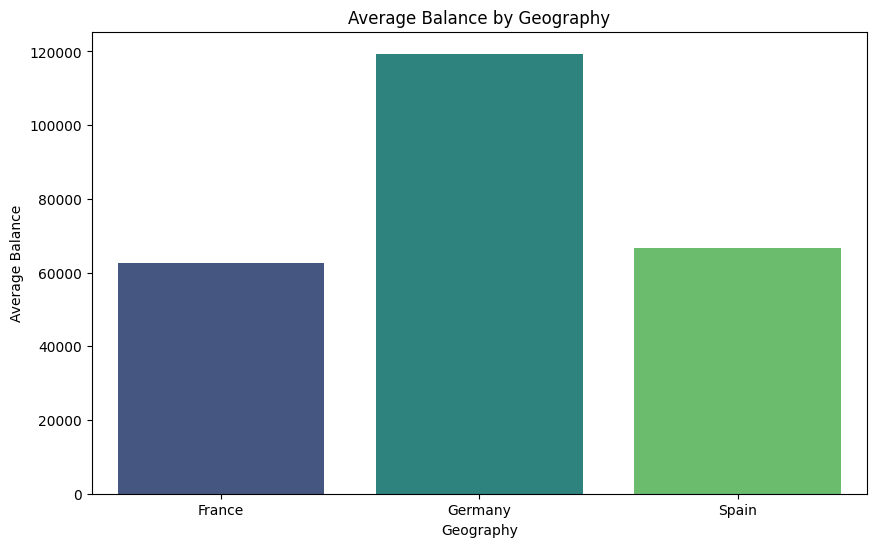

<ipython-input-21-466e4b11e7a2>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo_customer_count.index, y=geo_customer_count.values, palette='viridis')


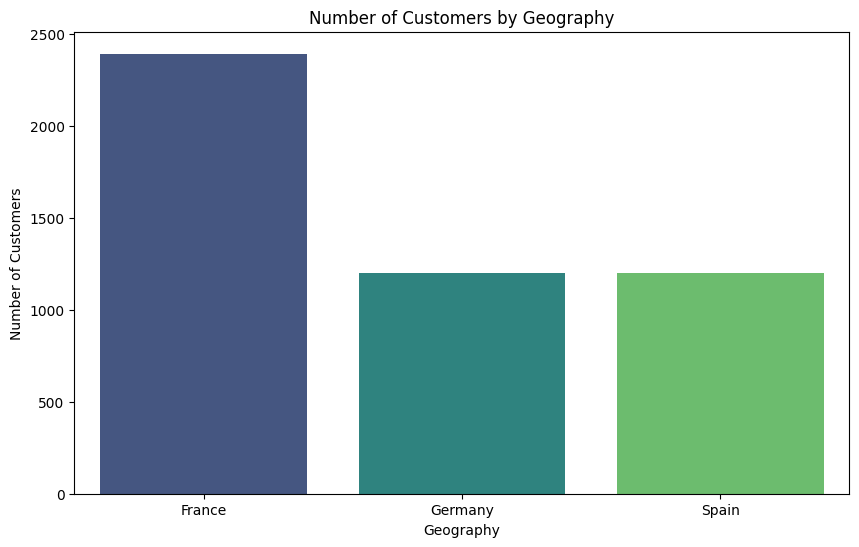

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total balance by geography
plt.figure(figsize=(10, 6))
sns.barplot(x=geo_total_balance.index, y=geo_total_balance.values, palette='viridis')
plt.title('Total Balance by Geography')
plt.xlabel('Geography')
plt.ylabel('Total Balance')
plt.show()

# Plot average balance by geography
plt.figure(figsize=(10, 6))
sns.barplot(x=geo_avg_balance.index, y=geo_avg_balance.values, palette='viridis')
plt.title('Average Balance by Geography')
plt.xlabel('Geography')
plt.ylabel('Average Balance')
plt.show()

# Plot number of customers by geography
plt.figure(figsize=(10, 6))
sns.barplot(x=geo_customer_count.index, y=geo_customer_count.values, palette='viridis')
plt.title('Number of Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.show()
